# Install required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import os

In [ ]:
# Install hdbscan
!pip install hdbscan
!pip install joblib==1.1.0

# Imports and Setup

In [ ]:
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Scaling
from sklearn.preprocessing import StandardScaler

# import hdbscan
from hdbscan import HDBSCAN

import pickle


In [ ]:
class documentClustering:

  def __init__(self):
    # instantiate scaler object
    self.scaler = StandardScaler()

  def train_cluster(self, train_df):
    df = self.scaler.fit_transform(train_df)
    model = HDBSCAN(min_cluster_size=100, min_samples=1, metric='euclidean', cluster_selection_method='eom', gen_min_span_tree=True, prediction_data=True).fit(df)

    return model, self.scaler

  def test_cluster(self, test_df, clusterer):
    df = self.scaler.transform(test_df)
    test_labels, strengths = hdbscan.approximate_predict(clusterer, df)
    return test_labels

  def plot_cluster(self,train_data, clusterer):
    temp_df = train_data.copy()
    temp_df['labels'] = clusterer.labels_
    temp_df = temp_df[temp_df['labels']!=-1]
    plt.figure(figsize=(12, 8))
    sns.scatterplot(temp_df['0'], temp_df['1'], hue=temp_df.labels, 
                    palette=sns.color_palette('hls', np.unique(temp_df.labels).shape[0]))
    plt.title('HDBSCAN with min_cluster_size 100, min samples 1')
    plt.show()

  def plot_figure(self, train_data, model):
  # combine two series and create and return a dataframe
    data = {"label": pd.Series(model.labels_),
          "doc_catagory": train_data['tech_health_tag']}

    df = pd.concat(data, axis = 1)
    plt.figure(figsize=(18,8))
    publication_plot = sns.countplot(
        data=df,
        x='label',
        hue = 'doc_catagory',
        palette='Set1',
        order = df['label'].value_counts().index
    )

    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

  def save_data(self, path_file, data):
    """
    1. Accept model and save in specific path location as a pickle 
    """ 
    with open(path_file, "wb") as f:
        pickle.dump(data, f)

    print('The file is saved')

In [ ]:
train_path = '/content/drive/MyDrive/GLG_project/data/GLG_train_data.csv'
df_train = pd.read_csv(train_path, sep=',')

In [ ]:
test_path = '/content/drive/MyDrive/GLG_project/data/GLG_test_data.csv'
df_test = pd.read_csv(test_path, sep=',')

In [ ]:
train_embd_path = '/content/drive/MyDrive/GLG_project/data/GLG_train_data_emb.csv'
df_train_embd = pd.read_csv(train_embd_path, sep=',')

In [ ]:
test_embd_path = '/content/drive/MyDrive/GLG_project/data/GLG_test_data_emb.csv'
df_test_embd = pd.read_csv(test_embd_path, sep=',')

In [ ]:
# Creat a class object to access all methods and instance of the class
class_object = documentClustering()

In [ ]:
# train hdbscan cluster model
cluster_model, scaler_object = class_object.train_cluster(df_train_embd)

In [ ]:
pd.DataFrame(cluster_model.labels_ , columns=['labels'])['labels'].value_counts()

 1     2217
-1     1232
 17     894
 22     733
 18     560
 20     493
 11     440
 3      381
 21     294
 2      263
 16     258
 6      258
 13     212
 8      208
 12     191
 14     186
 7      186
 15     158
 10     133
 4      130
 5      122
 9      121
 19     120
 0      110
Name: labels, dtype: int64

In [ ]:
# # cluster prediction for test data
# test_labels, strength = class_object.test_cluster(df_test_embd, cluster_model)

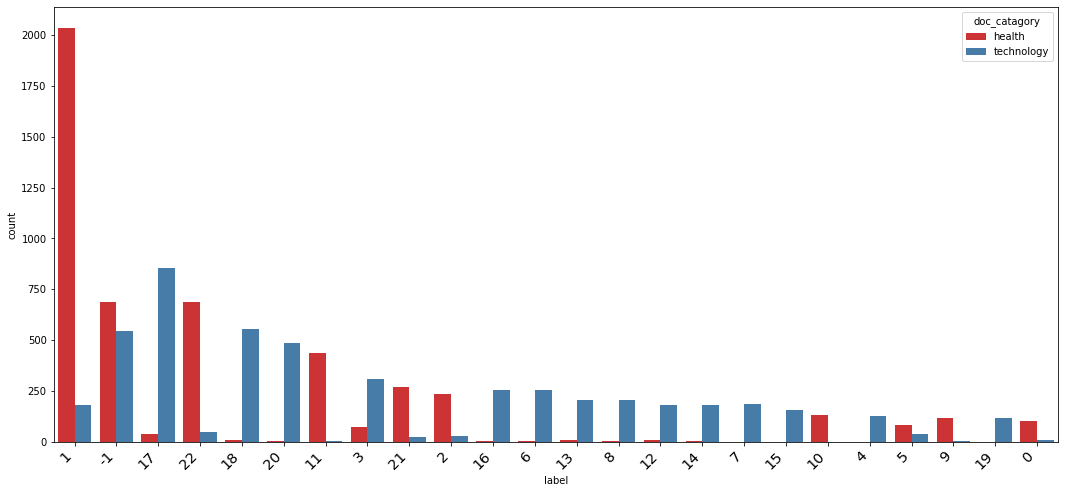

In [ ]:
# summery of total number of documents belong to each cluster
class_object.plot_figure(df_train, cluster_model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


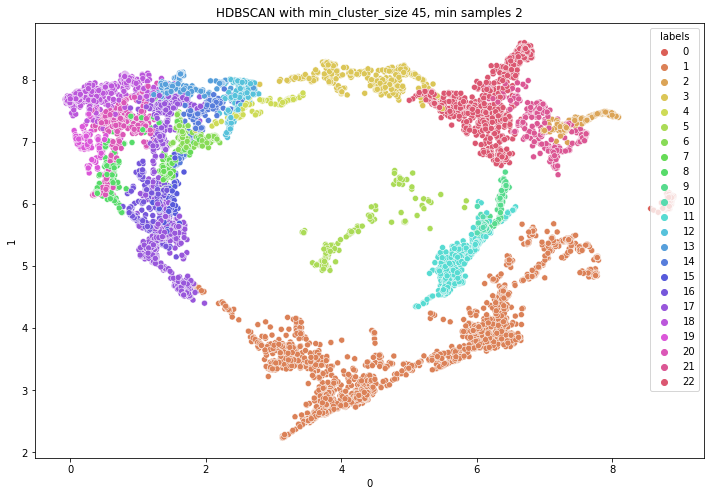

In [ ]:
# Plot training data points 
class_object.plot_cluster(df_train_embd, cluster_model)

In [ ]:
hier_df = cluster_model.condensed_tree_.to_pandas()

In [ ]:
# Document hierarchical 
hier_df.head()

,parent,child,lambda_val,child_size
0,9900,5759,0.337298,1
1,9900,1854,0.337298,1
2,9900,2322,0.337298,1
3,9900,4936,0.337298,1
4,9900,7039,0.337298,1


In [ ]:
all_labels = cluster_model.labels_
def get_clusterlable(x):
  try:
    l = all_labels[x]
  except:
    l = "P"
  return l

hier_df['cluster_label'] = hier_df['child'].apply(get_clusterlable)

In [ ]:
hier_df['cluster_label'].value_counts()

1     2217
-1    1232
17     894
22     733
18     560
20     493
11     440
3      381
21     294
2      263
6      258
16     258
13     212
8      208
12     191
14     186
7      186
15     158
10     133
4      130
5      122
9      121
19     120
0      110
P       62
Name: cluster_label, dtype: int64

In [ ]:
# Save document hierarchial structure which indicates parent and child relationship
hier_df.to_csv("/content/drive/MyDrive/GLG_project/data/hierarchial_cluster.csv", sep=',', index=False)

In [ ]:
all_parents = hier_df['parent'].unique().tolist()
len(all_parents)

63

In [ ]:
all_child = hier_df['child'].unique().tolist()

In [ ]:
len(all_child)

9962

In [ ]:
# root parent 
[i for i in all_parents if i not in all_child]

[9900]

In [ ]:
# The number of documents or child under parent 9900
child_9900 = hier_df[hier_df['parent']==9900]['child'].tolist()

In [ ]:
len(child_9900)

91

In [ ]:
# The number of parents under parent 9900. i.e out of 91 child 9900 has two child they have also child
[i for i in child_9900 if i in all_parents]

[9901, 9902]

In [ ]:
# save hdbscan model locally using the package pickel 
path_file = '/content/drive/MyDrive/model.pkl'
pickle.dump(cluster_model, open(path_file, 'wb'))

In [ ]:
# save train dataset using the package pickel 
df_train['cluster_label'] = cluster_model.labels_
path_file = '/content/drive/MyDrive/GLG_train_data_labeled.csv'
df_train.to_csv(path_file, sep=",", index=False)

In [ ]:
#save the scaler locally using the package pickel 
path_file = '/content/drive/MyDrive/GLG_train_data_scaler.pkl'
pickle.dump(scaler_object, open(path_file, 'wb')) 